# Modelo de Machine Learning para Predicción de Errores en Cuantía y Adiciones

In [1]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# Configurar directorio de trabajo
import os
os.chdir('/gdrive/MyDrive/Colab Notebooks/Machine Learning prediccion de errores')

In [3]:
# Revisar la carpeta
!ls

logs.log  prediccion_errores.ipynb  TRAIN_DATAF.xlsx


In [4]:
# Codigo para instalar pycaret
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 2.0 MB 44.8 MB/s 
     |████████████████████████████████| 262 kB 52.9 MB/s 
     |████████████████████████████████| 1.3 MB 54.8 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 167 kB 28.3 MB/s 
     |████████████████████████████████| 120 kB 68.2 MB/s 
     |████████████████████████████████| 1.7 MB 30.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 17.8 MB 581 kB/s 
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 6.8 MB 45.3 MB/s 
     |████████████████████████████████| 1.3 MB 42.0 MB/s 
     |████████████████████████████████| 6

In [5]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
datos = pd.read_excel('TRAIN_DATAF.xlsx')
datos.head()

,uid,error_cuantia_contrato,error_adicion,tipo_consulta,anno_cargue,anno_firma,nivel_entidad,orden_entidad,tipo_proceso,regimen_contratacion,...,tipo_contrato,cuantia_proceso,nombre_grupo,tipo_id_contratista,plazo_ejec_contrato,tiempo_adiciones,cuantia_contrato,valor_adiciones,moneda,departamento_entidad
0,20-4-10424146-9546251,1,0,Ceros adicionales,2020,2020,TERRITORIAL,TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,Régimen Especial,Régimen Especial,...,Suministro,399000,[E] Productos de Uso Final,Nit de Persona Jurídica,3,0,399000399000,0,Pesos (COP),Antioquia
1,20-4-10391293-9516353,1,0,Cuantia contrato cercano a cero,2020,2020,TERRITORIAL,TERRITORIAL DEPARTAMENTAL CENTRALIZADO,Régimen Especial,Régimen Especial,...,Prestación de Servicios,0,[F] Servicios,Cédula de Ciudadanía,12,0,0,0,Pesos (COP),Caldas
2,17-13-6612191-6123578,1,0,Cuantia contrato cercano a cero,2017,2017,NACIONAL,NACIONAL CENTRALIZADO,Contratación Mínima Cuantía,Estatuto General de Contratación,...,Prestación de Servicios,0,[F] Servicios,Nit de Persona Jurídica,240,0,0,0,Pesos (COP),Bogotá D.C.
3,16-4-4954822-4542935,1,1,Cuantia contrato cercano a cero,2016,2016,TERRITORIAL,TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,Régimen Especial,Régimen Especial,...,Prestación de Servicios,0,[F] Servicios,Nit de Persona Jurídica,24,876,0,65914597,Pesos (COP),Antioquia
4,18-12-7726931-7017431,0,0,Ninguna,2018,2018,NACIONAL,NACIONAL DESCENTRALIZADO,Contratación Directa (Ley 1150 de 2007),Estatuto General de Contratación,...,Prestación de Servicios,43957333,[F] Servicios,Cédula de Ciudadanía,11,0,43957333,0,Pesos (COP),Bogotá D.C.


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uid                     1656 non-null   object
 1   error_cuantia_contrato  1656 non-null   int64 
 2   error_adicion           1656 non-null   object
 3   tipo_consulta           1656 non-null   object
 4   anno_cargue             1656 non-null   int64 
 5   anno_firma              1656 non-null   int64 
 6   nivel_entidad           1656 non-null   object
 7   orden_entidad           1656 non-null   object
 8   tipo_proceso            1656 non-null   object
 9   regimen_contratacion    1656 non-null   object
 10  objeto_contratar        1656 non-null   object
 11  tipo_contrato           1656 non-null   object
 12  cuantia_proceso         1656 non-null   int64 
 13  nombre_grupo            1656 non-null   object
 14  tipo_id_contratista     1656 non-null   object
 15  plaz

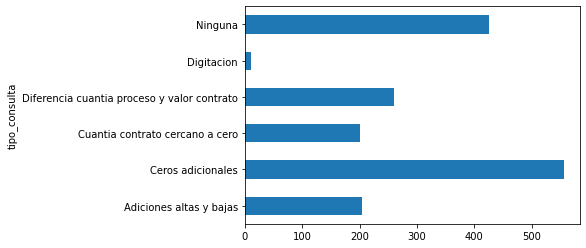

In [ ]:
datos.groupby('tipo_consulta').size().plot(kind = "barh")

In [ ]:
np.sum(datos.valor_adiciones > 0)

343

# Modelos de machine learning

In [9]:
from pycaret.classification import *

ImportError: ignored

## Configuración inicial

In [ ]:
setup_model = setup(data = datos, 
                    target = 'error_cuantia_contrato', 
                    ignore_features = ['uid','error_adicion'],
                    combine_rare_levels = True)

,Description,Value
0,session_id,4728
1,Target,error_cuantia_contrato
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1656, 21)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8913,0.9442,0.8067,0.8613,0.8319,0.7518,0.7538,0.133
rf,Random Forest Classifier,0.8904,0.9492,0.7603,0.8989,0.8227,0.7443,0.7507,0.576
gbc,Gradient Boosting Classifier,0.8853,0.9365,0.7707,0.8719,0.8168,0.7340,0.7380,0.382
dt,Decision Tree Classifier,0.8827,0.8726,0.8145,0.8329,0.8227,0.7351,0.7361,0.028
et,Extra Trees Classifier,0.8689,0.9316,0.7475,0.8464,0.7924,0.6972,0.7014,0.561
ada,Ada Boost Classifier,0.8602,0.9144,0.7553,0.8180,0.7827,0.6803,0.6838,0.188
knn,K Neighbors Classifier,0.8274,0.8234,0.6289,0.8196,0.7091,0.5896,0.6020,0.132
ridge,Ridge Classifier,0.8274,0.0000,0.6856,0.7771,0.7265,0.6014,0.6055,0.022
lda,Linear Discriminant Analysis,0.8223,0.8558,0.6908,0.7591,0.7224,0.5922,0.5944,0.054
qda,Quadratic Discriminant Analysis,0.7403,0.8097,0.4358,0.7284,0.5175,0.3609,0.4006,0.042


## Regresión logística

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5345,0.7006,0.8462,0.4074,0.5500,0.1760,0.2293
1,0.4828,0.7129,0.8421,0.3721,0.5161,0.1131,0.1606
2,0.4828,0.5977,0.8158,0.3690,0.5082,0.1040,0.1431
3,0.5431,0.7551,0.9211,0.4118,0.5691,0.2126,0.2970
4,0.5259,0.6842,0.8421,0.3951,0.5378,0.1658,0.2187
5,0.4741,0.6651,0.8158,0.3647,0.5041,0.0938,0.1310
6,0.5086,0.7782,0.9211,0.3933,0.5512,0.1702,0.2540
7,0.4569,0.6592,0.8158,0.3563,0.4960,0.0735,0.1060
8,0.8362,0.7677,0.5789,0.8800,0.6984,0.5925,0.6169
9,0.4696,0.7057,0.8947,0.3736,0.5271,0.1142,0.1788


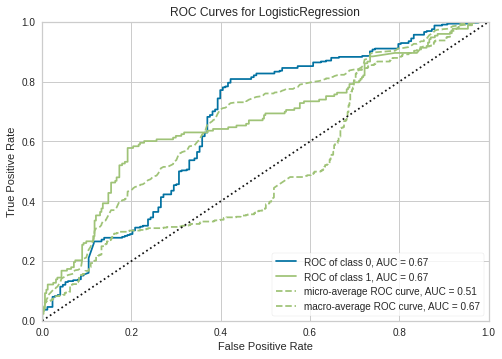

In [ ]:
plot_model(estimator=lr, plot='auc')

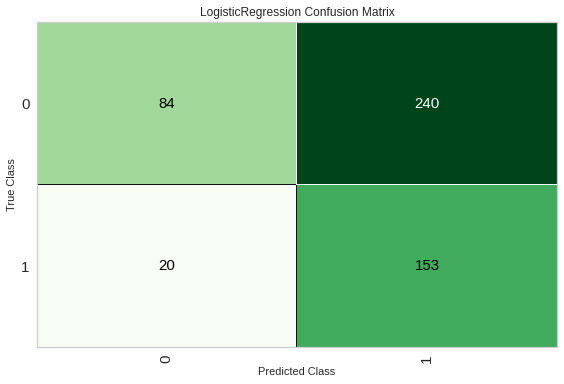

In [ ]:
plot_model(estimator=lr, plot='confusion_matrix')

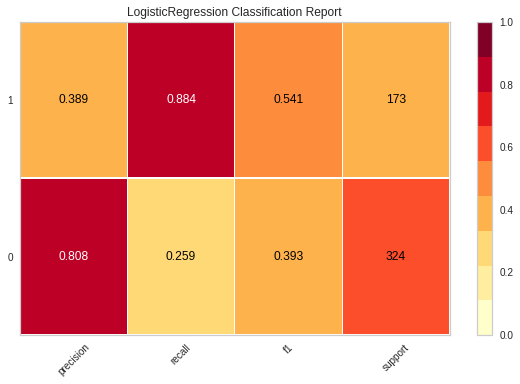

In [ ]:
plot_model(estimator=lr, plot='class_report')

## Arbol de decisión

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8793,0.8881,0.8205,0.8205,0.8205,0.7296,0.7296
1,0.8966,0.8691,0.7895,0.8824,0.8333,0.7587,0.7611
2,0.8362,0.8202,0.7368,0.7568,0.7467,0.6257,0.6258
3,0.8879,0.8804,0.8421,0.8205,0.8312,0.7473,0.7475
4,0.8534,0.8224,0.6842,0.8387,0.7536,0.6508,0.6577
5,0.8534,0.8473,0.8158,0.7561,0.7848,0.6739,0.6751
6,0.8793,0.8806,0.7895,0.8333,0.8108,0.7223,0.7229
7,0.8707,0.8618,0.8158,0.7949,0.8052,0.7084,0.7086
8,0.9052,0.9140,0.8947,0.8293,0.8608,0.7890,0.7903
9,0.8348,0.8479,0.7632,0.7436,0.7532,0.6291,0.6292


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8448,0.8926,0.7179,0.8000,0.7568,0.6433,0.6454
1,0.8190,0.8706,0.6579,0.7576,0.7042,0.5747,0.5777
2,0.8276,0.8463,0.6579,0.7812,0.7143,0.5921,0.5966
3,0.7672,0.8148,0.6053,0.6571,0.6301,0.4607,0.4616
4,0.7759,0.8507,0.6842,0.6500,0.6667,0.4980,0.4984
5,0.8103,0.8188,0.6316,0.7500,0.6857,0.5513,0.5555
6,0.8621,0.8929,0.7895,0.7895,0.7895,0.6869,0.6869
7,0.7500,0.7955,0.5000,0.6552,0.5672,0.3958,0.4030
8,0.8190,0.8585,0.6579,0.7576,0.7042,0.5747,0.5777
9,0.7826,0.8503,0.5789,0.7097,0.6377,0.4847,0.4898


In [ ]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=995, splitter='best')

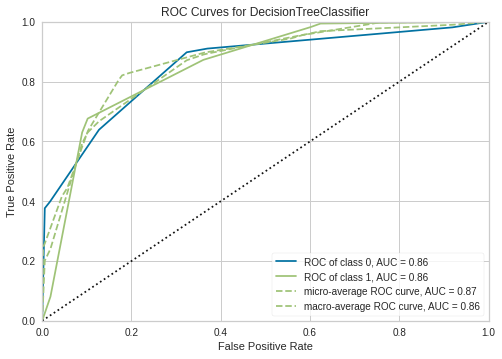

In [ ]:
plot_model(estimator=tuned_dt, plot='auc')

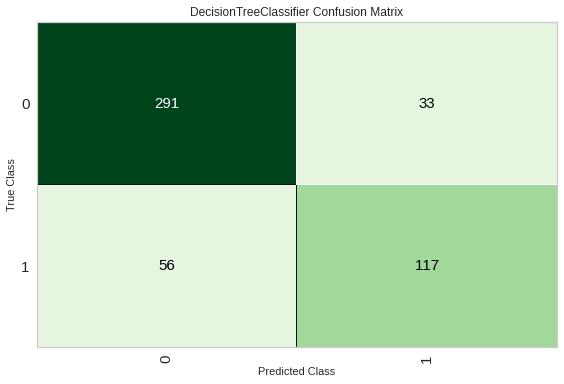

In [ ]:
plot_model(estimator=tuned_dt, plot='confusion_matrix')

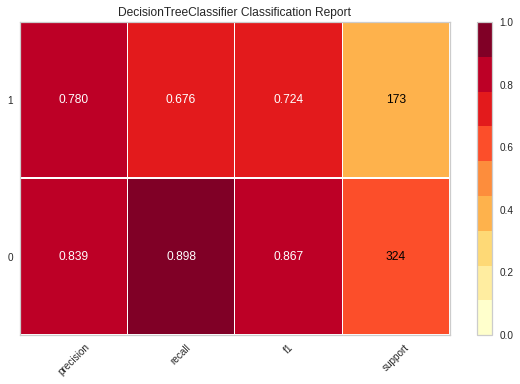

In [ ]:
plot_model(estimator=tuned_dt, plot='class_report')

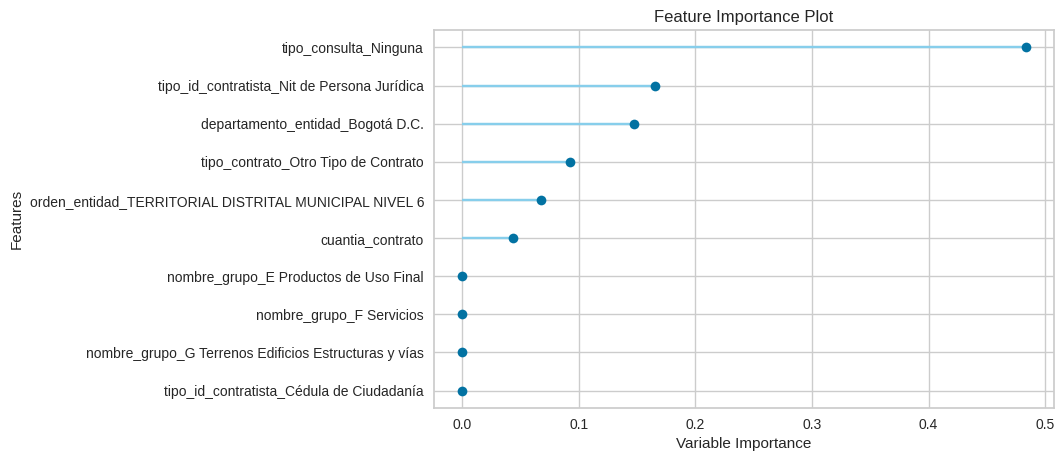

In [ ]:
plot_model(tuned_dt, plot='feature')

## Random forest

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8621,0.9158,0.7368,0.8235,0.7778,0.6782,0.6804
1,0.8707,0.9500,0.7692,0.8333,0.8000,0.7047,0.7059
2,0.9224,0.9554,0.7949,0.9688,0.8732,0.8181,0.8264
3,0.9052,0.9417,0.7949,0.9118,0.8493,0.7806,0.7845
4,0.8966,0.9291,0.7949,0.8857,0.8378,0.7622,0.7646
5,0.8879,0.9444,0.7179,0.9333,0.8116,0.7338,0.7465
6,0.8966,0.9569,0.7692,0.9091,0.8333,0.7591,0.7647
7,0.8707,0.9620,0.6667,0.9286,0.7761,0.6886,0.7073
8,0.8793,0.9700,0.7692,0.8571,0.8108,0.7226,0.7249
9,0.9130,0.9670,0.7895,0.9375,0.8571,0.7953,0.8014


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


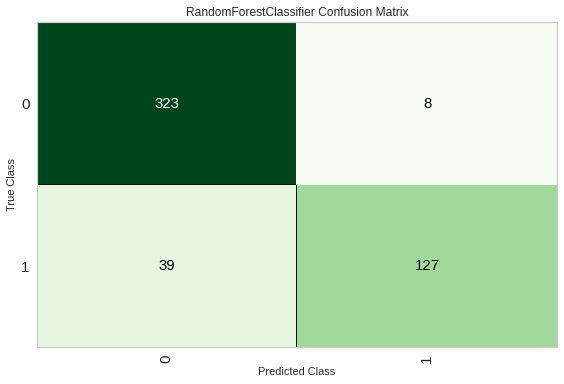

In [ ]:
plot_model(estimator=rf, plot='confusion_matrix')